In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#lab: Linear Regression
df = pd.read_csv('../datasets/Boston.csv')
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
model = LinearRegression()  
model.fit(df[['lstat']], df[['medv']]) #(x,y)


LinearRegression()

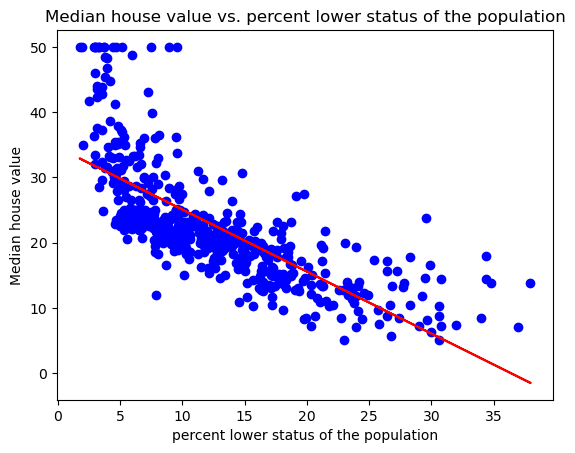

In [5]:
plt.scatter(df[['lstat']], df[['medv']], color= 'blue')
plt.plot(df[['lstat']],
         model.predict(df[['lstat']]), color = 'red')
plt.title('Median house value vs. percent lower status of the population')
plt.xlabel('percent lower status of the population')
plt.ylabel('Median house value')
plt.show()

In [6]:
model.score(df[['lstat']], df[['medv']])
# Coefficients
beta = model.coef_
print("Beta coefficients: ", beta)
# Intercept
alpha = model.intercept_
print("Intercept: ", alpha) #both are the same as R

Beta coefficients:  [[-0.95004935]]
Intercept:  [34.55384088]


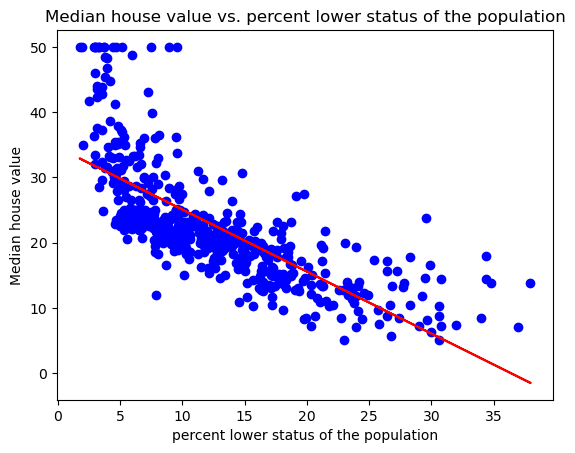

In [ ]:
plt.scatter(df[['lstat']], df[['medv']], color= 'blue')
plt.plot(df[['lstat']],
         model.predict(df[['lstat']]), color = 'red')
plt.title('Median house value vs. percent lower status of the population')
plt.xlabel('percent lower status of the population')
plt.ylabel('Median house value')
plt.show()

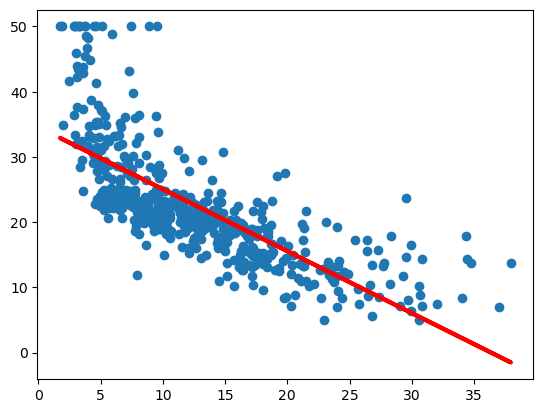

In [27]:
import numpy as np

plt.scatter(df['lstat'], df['medv'])
m , b = np.polyfit(df['lstat'], df['medv'],1)
plt.plot(df['lstat'], m * df['lstat'] + b, color = 'red', linewidth=3)
plt.show()

In [8]:
# Predictions
predictions = model.predict(df[['lstat']])

# Calculate mean squared error
mse = mean_squared_error(df['medv'], predictions)

# Calculate Residual Standard Error
rse = np.sqrt(mse)
print("Residual Standard Error: ", rse)

Residual Standard Error:  6.203464131426419


In [22]:
#3.6.3 Multiple Linear Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assume you have multiple features
X = df[['lstat', 'age', 'zn']]

# Add a constant to the array for the intercept
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)



   VIF Factor features
0   12.554181    const
1    1.587432    lstat
2    1.948815      age
3    1.497117       zn


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop('medv', axis=1)
y = df['medv']

model.fit(X, y)

import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X)



# Calculate mean squared error
mse = mean_squared_error(df['medv'], predictions)

# Calculate Residual Standard Error
rse = np.sqrt(mse)
print("Residual Standard Error: ", rse)

# Calculate R^2 score
r2 = r2_score(df['medv'], predictions)
print("R^2 score: ", r2)

Residual Standard Error:  4.672175856750632
R^2 score:  0.7414197819753733


In [18]:
#3.6.4 Interaction Terms
X = df[['lstat', 'age']]  # Features
y = df['medv']  # Target

model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(df['medv'], predictions)

# Calculate Residual Standard Error
rse = np.sqrt(mse)
print("Residual Standard Error: ", rse)

# Calculate R^2 score
r2 = r2_score(df['medv'], predictions)
print("R^2 score: ", r2)

Residual Standard Error:  6.154809265315431
R^2 score:  0.5512689379421003


Residual Standard Error:  5.507315142231622
R^2 score:  0.6407168971636612


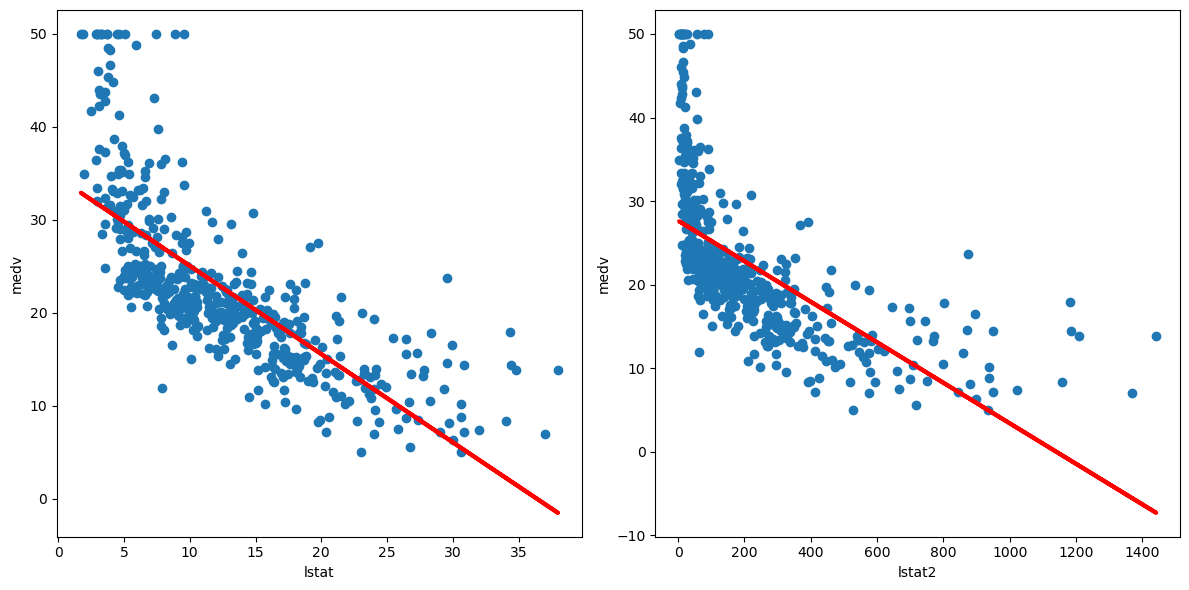

In [34]:
# 3.6.5 Non-linear Transformations of the Predictors
import statesmodels.api as sm
df['lstat2'] = df['lstat']**2
X = df[['lstat', 'lstat2']]  # Features
y = df['medv']  # Target
model.fit(X, y)
# Predictions
predictions = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(df['medv'], predictions)

# Calculate Residual Standard Error
rse = np.sqrt(mse)
print("Residual Standard Error: ", rse)

# Calculate R^2 score
r2 = r2_score(df['medv'], predictions)
print("R^2 score: ", r2)

# Create a scatter plot for 'lstat'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['lstat'], y)
m , b = np.polyfit(df['lstat'], y, 1)
plt.plot(df['lstat'], m * df['lstat'] + b, color = 'red', linewidth=3)
plt.xlabel('lstat')
plt.ylabel('medv')

# Create a scatter plot for 'lstat2'
plt.subplot(1, 2, 2)
plt.scatter(df['lstat2'], y)
m , b = np.polyfit(df['lstat2'], y, 1)
plt.plot(df['lstat2'], m * df['lstat2'] + b, color = 'red', linewidth=3)
plt.xlabel('lstat2')
plt.ylabel('medv')

plt.tight_layout()
plt.show()

In [35]:
# Add a constant to the features matrix for the intercept
X = sm.add_constant(df[['lstat', 'lstat2']])

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model, which includes the p-values
print(results.summary()) #this is so much better than how I was doing it before

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.56e-112
Time:                        01:41:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

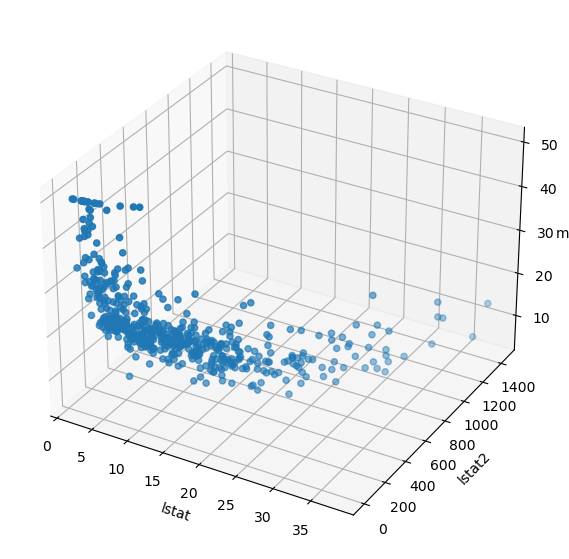

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(df['lstat'], df['lstat2'], y)

ax.set_xlabel('lstat')
ax.set_ylabel('lstat2')
ax.set_zlabel('medv')

plt.show()

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('medv ~ lstat + lstat2', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
# Print the summary of the model
print(anova_results)

                sum_sq     df           F        PR(>F)
lstat     10833.300262    1.0  355.057255  2.548861e-60
lstat2     4125.138260    1.0  135.199822  7.630116e-28
Residual  15347.243158  503.0         NaN           NaN


In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model and get the coefficients
coefficients = np.polyfit(df['lstat'], df['medv'], 5) #5th degree polynomial

# Create the polynomial variable
df['lstat_poly'] = np.polyval(coefficients, df['lstat'])

# Fit the model
model = ols('medv ~ lstat_poly', data=df).fit()

# Create the ANOVA table
anova_results = sm.stats.anova_lm(model, typ=2)
# Print the summary of the model
print(model.summary())
# Print the ANOVA table
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1079.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          2.25e-127
Time:                        02:01:39   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3105.
Df Residuals:                     504   BIC:                             3114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.552e-15      0.724  -6.29e-15      1.0

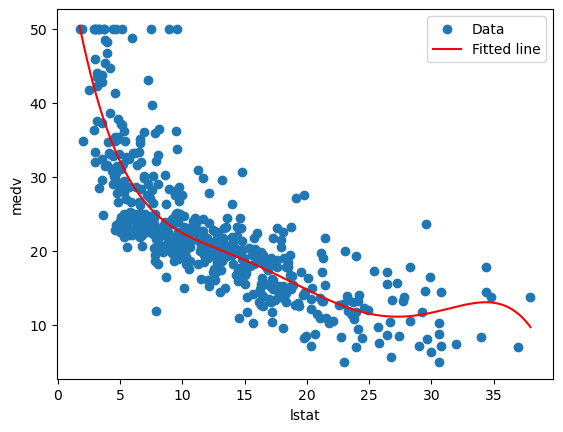

In [43]:
# Generate a sequence of values in the range of 'lstat'
x = np.linspace(df['lstat'].min(), df['lstat'].max(), 500)

# Compute the corresponding y values
y = np.polyval(coefficients, x)

# Plot the data points
plt.scatter(df['lstat'], df['medv'], label='Data')

# Plot the fitted line
plt.plot(x, y, color='red', label='Fitted line')

# Add labels and a legend
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Apply the log transformation
df['log_rm'] = np.log(df['rm'])

# Fit the model
model = smf.ols('medv ~ log_rm', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.22e-64
Time:                        02:17:18   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

In [46]:
#3.6.6 Qualitative Predictors
Car_df = pd.read_csv('../datasets/Carseats.csv')
Car_df.head(10)

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,9,6.54,132,110,0,108,124,Medium,76,10,No,No
9,10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [48]:
import statsmodels.formula.api as smf

# Define the formula
formula = 'Sales ~ CompPrice + Income + Advertising + Population + Price + C(ShelveLoc) + Age + Education + C(Urban) + C(US) + Income:Advertising + Price:Age'
#In this code, `C(ShelveLoc)`, `C(Urban)`, and `C(US)` are used to indicate that 'ShelveLoc', 'Urban', and 'US' are categorical variables
# Fit the model
model = smf.ols(formula, data=Car_df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          6.14e-166
Time:                        02:32:46   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

In [49]:
# Create dummy variables for 'ShelveLoc'
dummies = pd.get_dummies(Car_df['ShelveLoc'])

# Print the dummy variables
print(dummies.head())

   Bad  Good  Medium
0    1     0       0
1    0     1       0
2    0     0       1
3    0     0       1
4    1     0       0


In [52]:
def load_libs():
    import pandas as pd
    import numpy as np
    import plotly.express as px
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from statsmodels.formula.api import ols
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.metrics import mean_squared_error, r2_score
    from statsmodels.stats.outliers_influence import variance_inflation_factor
